### Scikit-Learn: regresión lineal

En este notebook, entrenaremos un modelo simple de regresión lineal a partir de un dataset de rendimiento de estudiantes.

Se trata de uno de los modelos más simples, pero los pasos que se utilizan para entrenarlo son prácticamente idénticas para otros muchos modelos de aprendizaje supervisado (tanto de regresión, como de clasificación y clustering).

A partir de lo aprendido aquí, podríamos ejecutar otros modelos como _Regresión polinómica_, _SVM_ o _Random Forests_ inmediatamente sobre el mismo dataset (por supuesto, hay que tener cuidado con el _overfitting_!)

In [2]:
# Primero, importamos todo lo que vamos a necesitar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

### Carga y limpieza de datos

In [3]:
# Y leemos el dataset
DATA_FOLDER = os.path.join("..", "data")
FILENAME = "student_performance.csv"
df = pd.read_csv(os.path.join(DATA_FOLDER, FILENAME))
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

## Exploración de los datos
- La variable ```Performance Index``` es la que queremos predecir (variable objetivo). Para ello, usaremos el resto de variables del dataset en la medida de lo posible.
- Vamos a hacer algunos plots para ver que variables podrían ser más interesantes a simple vista

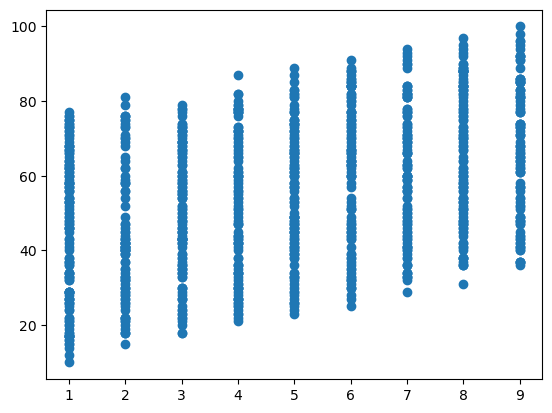

In [4]:
plt.scatter(df['Hours Studied'], df['Performance Index'])

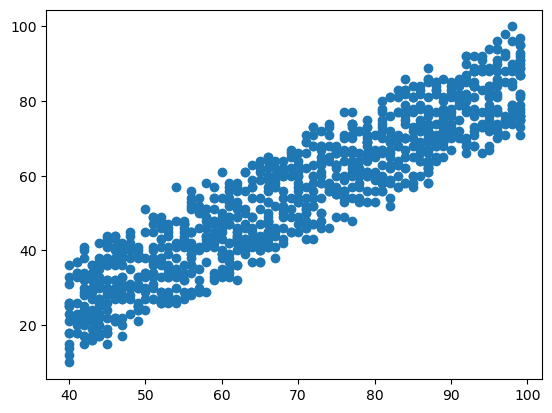

In [6]:
plt.scatter(df['Previous Scores'], df['Performance Index'])

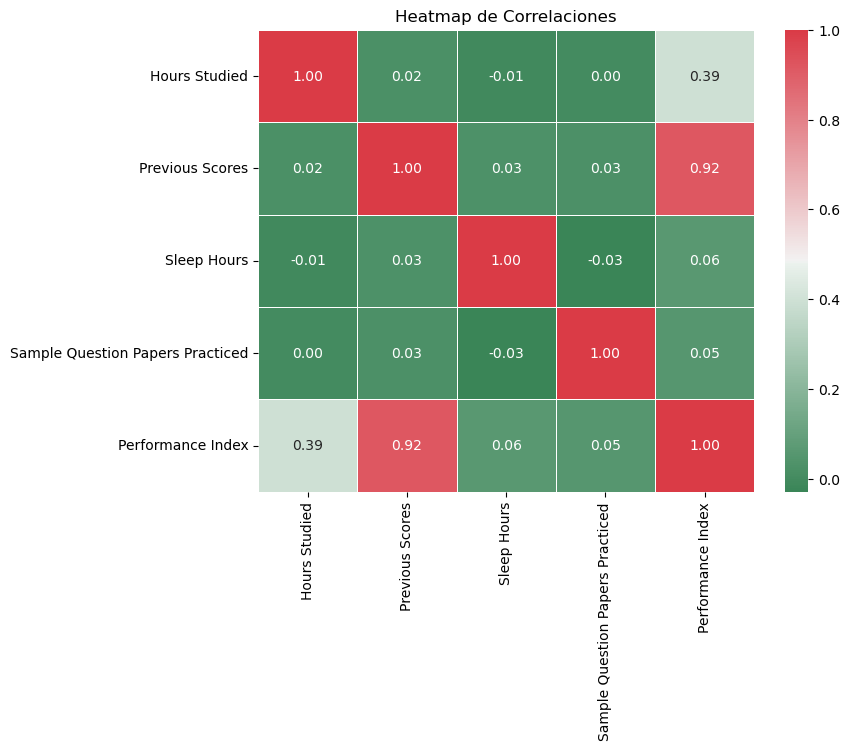

In [7]:
import seaborn as sns
    
df_num = df.select_dtypes('number')
corr_mat = df_num.corr()
    
plt.figure(figsize=(8, 6))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(corr_mat, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
    
plt.title("Heatmap de Correlaciones")
plt.show()

## Entrenamiento del modelo lineal
- Claramente, `Previous Score` es la columna más importante
- También hay algo de correlación con `Hours Studied`
- El resto de columnas no tienen prácticamente correlación, asi que no merece la pena incluirlas en un modelo lineal

### Pipelines

- Podemos agilizar el proceso de entrenamiento usando `Pipeline`
- Especificamos todos los pasos y solo ejecutamos un `fit()` y un `predict()`
- Muy útil para procesos más complicados

### Trabajar con datos categóricos

- Por último, vamos a entrenar un modelo usando también las otras variables y la variable categórica
- Para ello, usamos `pd.get_dummies`